# EX 1

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import scipy.stats
import matplotlib.figure as fig
import matplotlib.pyplot as plt

In [62]:
v = [np.random.choice(np.arange(-1,2), p=[0.4, 0.2, 0.4]) for _ in range(1000)]

In [ ]:
# mean = sum(v) / 1000
# arr = np.array(v)
# np.var(arr)
# s = (sum( [ (v[i] - mean)**2 for i in range(1000)] ) / 100)**0.5
# s

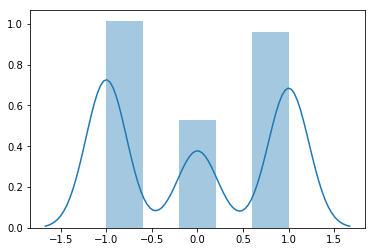

In [168]:
sns.distplot(v)

In [167]:
small = [np.random.choice(np.arange(-1,2), p=[0.4, 0.2, 0.4]) for _ in range(10)]
small

[-1, -1, 0, -1, 1, -1, -1, -1, 0, 0]

In [77]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [78]:
mean_confidence_interval(small)

(0.1, -0.5263629556565124, 0.7263629556565123)

In [103]:
def try1000(ans, ln):
    for i in range(1000):
        small = [np.random.choice(np.arange(-1,2), p=[0.4, 0.2, 0.4]) for _ in range(ln)]
        m, l, r = mean_confidence_interval(small)
        if l <= 0 <= r :
            ans.append(1)
        else:
            ans.append(0)
    return sum(ans) / 1000 * 100

In [169]:
ten = try1000([], 10)
fifth = try1000([], 15)
twenth = try1000([], 20)
twenfifth = try1000([], 25)
therth = try1000([], 30)

In [171]:
print('{:.1f}'.format(ten) + ' %')
print('{:.1f}'.format(fifth) + ' %')
print('{:.1f}'.format(twenth) + ' %')
print('{:.1f}'.format(twenfifth) + ' %')
print('{:.1f}'.format(therth) + ' %')

96.5 %
93.6 %
95.5 %
96.0 %
94.6 %


<BarContainer object of 5 artists>

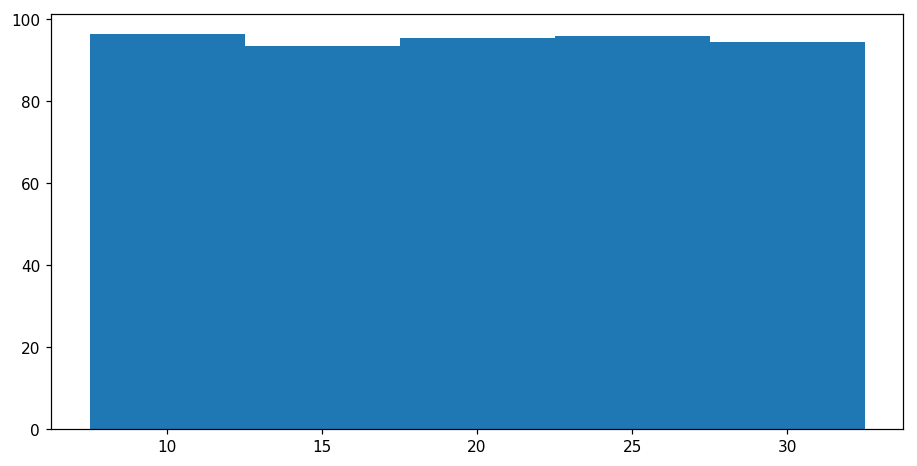

In [213]:
fig = plt.figure(figsize=(10., 5.), dpi=110)
plt.bar([10, 15, 20, 25, 30], [ten, fifth, twenth, twenfifth, therth], width=5, linewidth=100, alpha=1)

# EX 2
### Генерация всевдослучайных чисел степенным остаточным методом
Назначаем начальное число z1 < 10000. Последующие числа получаем из соотношения z_i = ((z_{i-1}^{2.5})//100)%10000, div — целая часть от деления, mod — остаток от деления.
Полученная последовательность укладывается в пределы от 0 до 1 так: x_i = z_i / 10000.


In [214]:
import random
def generate_ost_1(n):
    z1 = random.randint(-100, 10000)
    arr = [z1]
    for i in range(n - 1):
        arr.append(int(((arr[-1]**2.5) // 100) % 10000))
    arr = [arr[i] / 10000 for i in range(len(arr))]
    return arr

In [215]:
arr = generate_ost_1(100)
arr[:10]

[0.8198, 0.1289, 0.653, 0.7435, 0.5311, 0.6101, 0.3851, 0.3092, 0.6168, 0.8645]